# STEP 1-PREPROCESSING THE IMAGE

Import Libraries

In [ ]:
from PIL import Image
import numpy as np
import requests
from io import BytesIO

Loading a Training Image.

Image loaded successfully.
Displaying the original image:


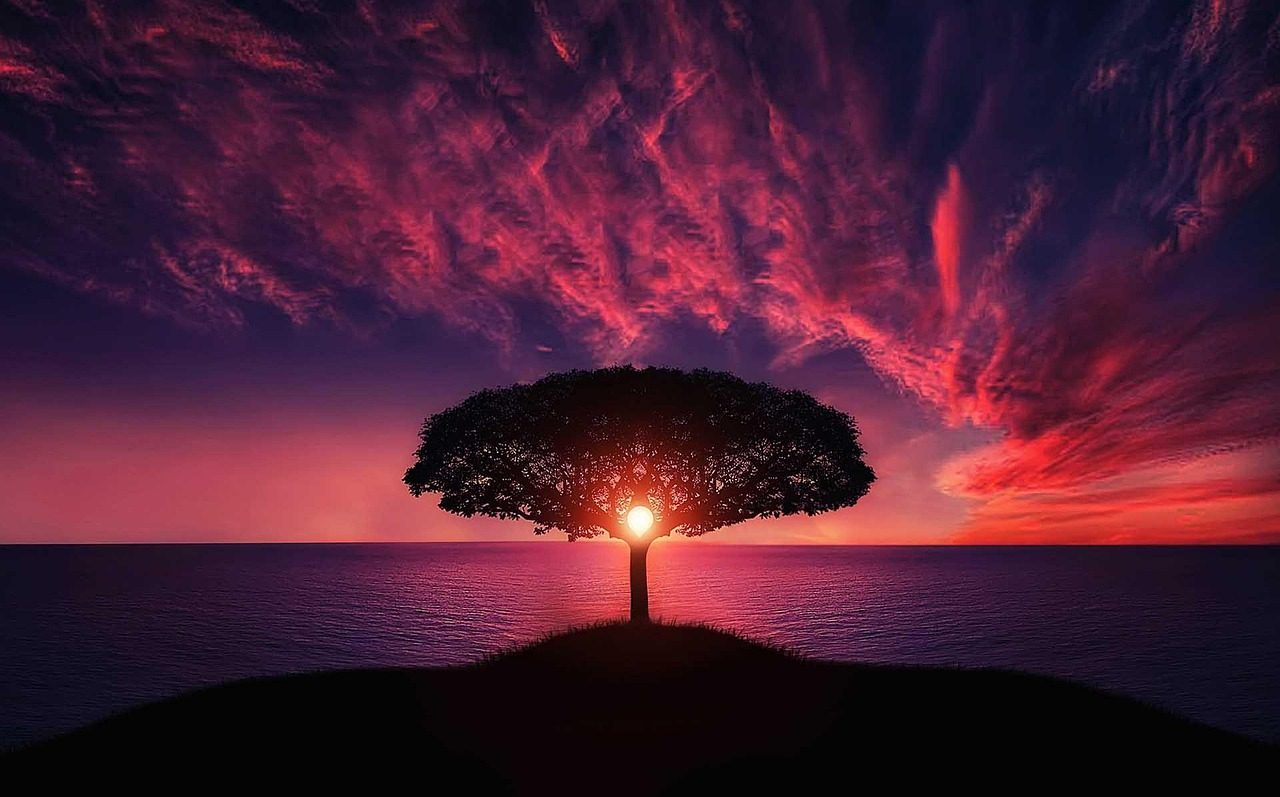

In [ ]:
# Install the necessary library in Google Colab
# !pip install Pillow

from PIL import Image
from IPython.display import display
import requests
from io import BytesIO

# Step 1: Load an image from a URL
image_url = "https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885_1280.jpg"

try:
    response = requests.get(image_url)
    img_data = BytesIO(response.content)
    original_image = Image.open(img_data)
    print("Image loaded successfully.")

except Exception as e:
    print(f"Error loading image: {e}")
    # You can load a local image as a fallback
    # original_image = Image.open("your_local_image.jpg")

# Step 2: Display the original image
if 'original_image' in locals():
    print("Displaying the original image:")
    display(original_image)

Converting the image to grayscare to reduce the complexity

Image converted to grayscale.
Displaying the grayscale image:


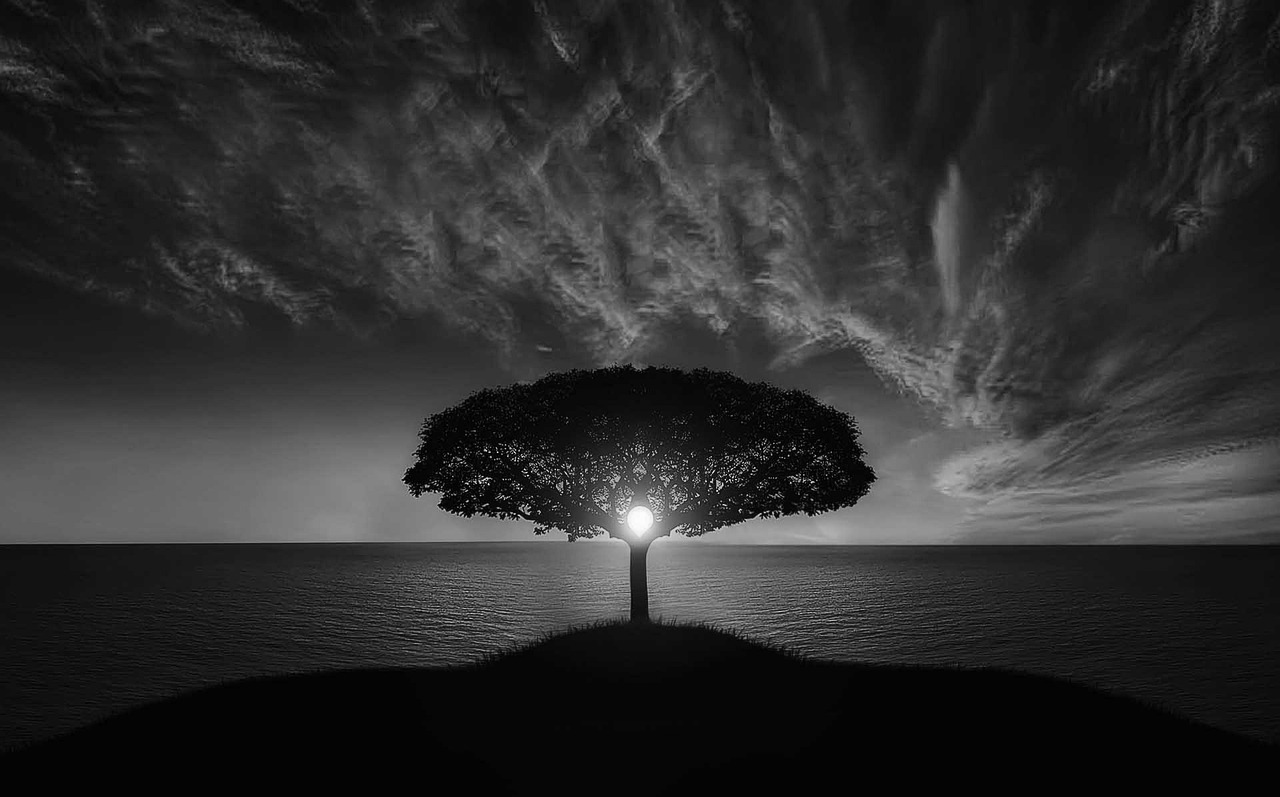

In [ ]:


if original_image:
    # Step 2: Convert the image to grayscale
    grayscale_image = original_image.convert('L')
    print("Image converted to grayscale.")

    # Step 3: Display the grayscale image
    print("Displaying the grayscale image:")
    display(grayscale_image)



In [ ]:
from PIL import Image
import numpy as np

# This part assumes 'grayscale_image' is a PIL Image object from the previous step.
# For demonstration, we'll create a dummy grayscale image. In your project, you'll
# use the output from the first code block.
try:
    # Re-create the grayscale image from the URL for this standalone snippet
    from io import BytesIO
    import requests
    response = requests.get("https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885_1280.jpg")
    img_data = BytesIO(response.content)
    grayscale_image = Image.open(img_data).convert('L')
except Exception as e:
    print(f"Error: {e}")
    grayscale_image = None

if grayscale_image:
    # Step 1: Resize the grayscale image to 4x4 pixels
    resized_image = grayscale_image.resize((4, 4), Image.LANCZOS)
    print("Image resized to 4x4 pixels.")

    # Step 2: Get the pixel values as a NumPy array
    pixel_matrix = np.array(resized_image)

    # Step 3: Print the final 4x4 pixel matrix
    print("\nFinal 4x4 pixel matrix:")
    print(pixel_matrix)
    print(f"\nDimensions of the final matrix: {pixel_matrix.shape}")

Image resized to 4x4 pixels.

Final 4x4 pixel matrix:
[[30 52 45 25]
 [43 57 69 50]
 [76 72 78 76]
 [12 29 28 11]]

Dimensions of the final matrix: (4, 4)


# STEP -2 On-Center / Off-Center Filters

Defining the On-Centre and Off-Centre filters


In [ ]:
import numpy as np

# Define the on-center filter
on_center_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Define the off-center filter
off_center_filter = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

print("On-Center Filter:")
print(on_center_filter)
print("\nOff-Center Filter:")
print(off_center_filter)

On-Center Filter:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

Off-Center Filter:
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


Performimg Convolution
(on centre)


In [ ]:
import numpy as np

# Assuming pixel_matrix and on_center_filter are already defined

# The 3x3 filter can be centered at four positions on the 4x4 matrix
# to produce a 2x2 output. Let's show the calculation for each position.

# Top-Left position (output[0, 0])
print("--- Top-Left Position (Output[0, 0]) ---")
section_tl = pixel_matrix[0:3, 0:3]
print("Pixel Matrix Section:")
print(section_tl)
print("\nOn-Center Filter:")
print(on_center_filter)
multiplied_tl = section_tl * on_center_filter
print("\nElement-wise multiplication:")
print(multiplied_tl)
output_tl = np.sum(multiplied_tl)
print("\nSum (Output value):", output_tl)
print("-" * 30)

# Top-Right position (output[0, 1])
print("--- Top-Right Position (Output[0, 1]) ---")
section_tr = pixel_matrix[0:3, 1:4]
print("Pixel Matrix Section:")
print(section_tr)
print("\nOn-Center Filter:")
print(on_center_filter)
multiplied_tr = section_tr * on_center_filter
print("\nElement-wise multiplication:")
print(multiplied_tr)
output_tr = np.sum(multiplied_tr)
print("\nSum (Output value):", output_tr)
print("-" * 30)


# Bottom-Left position (output[1, 0])
print("--- Bottom-Left Position (Output[1, 0]) ---")
section_bl = pixel_matrix[1:4, 0:3]
print("Pixel Matrix Section:")
print(section_bl)
print("\nOn-Center Filter:")
print(on_center_filter)
multiplied_bl = section_bl * on_center_filter
print("\nElement-wise multiplication:")
print(multiplied_bl)
output_bl = np.sum(multiplied_bl)
print("\nSum (Output value):", output_bl)
print("-" * 30)


# Bottom-Right position (output[1, 1])
print("--- Bottom-Right Position (Output[1, 1]) ---")
section_br = pixel_matrix[1:4, 1:4]
print("Pixel Matrix Section:")
print(section_br)
print("\nOn-Center Filter:")
print(on_center_filter)
multiplied_br = section_br * on_center_filter
print("\nElement-wise multiplication:")
print(multiplied_br)
output_br = np.sum(multiplied_br)
print("\nSum (Output value):", output_br)
print("-" * 30)

# You can compare these output values to the result of convolve2d with mode='valid'
# The final output matrix from convolve2d will be [[output_tl, output_tr], [output_bl, output_br]]

--- Top-Left Position (Output[0, 0]) ---
Pixel Matrix Section:
[[30 52 45]
 [43 57 69]
 [76 72 78]]

On-Center Filter:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

Element-wise multiplication:
[[-30 -52 -45]
 [-43 456 -69]
 [-76 -72 -78]]

Sum (Output value): -9
------------------------------
--- Top-Right Position (Output[0, 1]) ---
Pixel Matrix Section:
[[52 45 25]
 [57 69 50]
 [72 78 76]]

On-Center Filter:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

Element-wise multiplication:
[[-52 -45 -25]
 [-57 552 -50]
 [-72 -78 -76]]

Sum (Output value): 97
------------------------------
--- Bottom-Left Position (Output[1, 0]) ---
Pixel Matrix Section:
[[43 57 69]
 [76 72 78]
 [12 29 28]]

On-Center Filter:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

Element-wise multiplication:
[[-43 -57 -69]
 [-76 576 -78]
 [-12 -29 -28]]

Sum (Output value): 184
------------------------------
--- Bottom-Right Position (Output[1, 1]) ---
Pixel Matrix Section:
[[57 69 50]
 [72 78 76]
 [29 28 11]]

On-Center Filter:
[[-1 -1 -1]

On-Center Filter Sum Values:

Top-Left (Output[0, 0]): -9

Top-Right (Output[0, 1]): 97

Bottom-Left (Output[1, 0]): 184

Bottom-Right (Output[1, 1]): 232

Interpretation for On-Center Filter:

Large Positive Values (e.g., 97, 184, 232): These indicate a strong detection of an on-center pattern at these locations. This means there's likely a bright area in the center surrounded by darker areas.
Values Close to Zero: If there were values close to zero, it would suggest no strong on-center or off-center pattern was detected.
Large Negative Values (e.g., -9): This indicates a strong detection of the opposite pattern of the filter. For the on-center filter, a large negative value suggests an off-center pattern (a dark area in the center surrounded by brighter areas).

Applying Convolution(Off Centre)


In [ ]:
import numpy as np

# Assuming pixel_matrix and off_center_filter are already defined

# The 3x3 filter can be centered at four positions on the 4x4 matrix
# to produce a 2x2 output. Let's show the calculation for each position.

# Top-Left position (output[0, 0])
print("--- Top-Left Position (Output[0, 0]) ---")
section_tl = pixel_matrix[0:3, 0:3]
print("Pixel Matrix Section:")
print(section_tl)
print("\nOff-Center Filter:")
print(off_center_filter)
multiplied_tl = section_tl * off_center_filter
print("\nElement-wise multiplication:")
print(multiplied_tl)
output_tl = np.sum(multiplied_tl)
print("\nSum (Output value):", output_tl)
print("-" * 30)

# Top-Right position (output[0, 1])
print("--- Top-Right Position (Output[0, 1]) ---")
section_tr = pixel_matrix[0:3, 1:4]
print("Pixel Matrix Section:")
print(section_tr)
print("\nOff-Center Filter:")
print(off_center_filter)
multiplied_tr = section_tr * off_center_filter
print("\nElement-wise multiplication:")
print(multiplied_tr)
output_tr = np.sum(multiplied_tr)
print("\nSum (Output value):", output_tr)
print("-" * 30)


# Bottom-Left position (output[1, 0])
print("--- Bottom-Left Position (Output[1, 0]) ---")
section_bl = pixel_matrix[1:4, 0:3]
print("Pixel Matrix Section:")
print(section_bl)
print("\nOff-Center Filter:")
print(off_center_filter)
multiplied_bl = section_bl * off_center_filter
print("\nElement-wise multiplication:")
print(multiplied_bl)
output_bl = np.sum(multiplied_bl)
print("\nSum (Output value):", output_bl)
print("-" * 30)


# Bottom-Right position (output[1, 1])
print("--- Bottom-Right Position (Output[1, 1]) ---")
section_br = pixel_matrix[1:4, 1:4]
print("Pixel Matrix Section:")
print(section_br)
print("\nOff-Center Filter:")
print(off_center_filter)
multiplied_br = section_br * off_center_filter
print("\nElement-wise multiplication:")
print(multiplied_br)
output_br = np.sum(multiplied_br)
print("\nSum (Output value):", output_br)
print("-" * 30)

# You can compare these output values to the result of convolve2d with mode='valid'
# The final output matrix from convolve2d will be [[output_tl, output_tr], [output_bl, output_br]]

--- Top-Left Position (Output[0, 0]) ---
Pixel Matrix Section:
[[30 52 45]
 [43 57 69]
 [76 72 78]]

Off-Center Filter:
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]

Element-wise multiplication:
[[  30   52   45]
 [  43 -456   69]
 [  76   72   78]]

Sum (Output value): 9
------------------------------
--- Top-Right Position (Output[0, 1]) ---
Pixel Matrix Section:
[[52 45 25]
 [57 69 50]
 [72 78 76]]

Off-Center Filter:
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]

Element-wise multiplication:
[[  52   45   25]
 [  57 -552   50]
 [  72   78   76]]

Sum (Output value): -97
------------------------------
--- Bottom-Left Position (Output[1, 0]) ---
Pixel Matrix Section:
[[43 57 69]
 [76 72 78]
 [12 29 28]]

Off-Center Filter:
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]

Element-wise multiplication:
[[  43   57   69]
 [  76 -576   78]
 [  12   29   28]]

Sum (Output value): -184
------------------------------
--- Bottom-Right Position (Output[1, 1]) ---
Pixel Matrix Section:
[[57 69 50]
 [72 78 76]
 [29 28 11]]

Off-Center Filter Sum Values:

Top-Left (Output[0, 0]): 184

Top-Right (Output[0, 1]): 136

Bottom-Left (Output[1, 0]): -184

Bottom-Right (Output[1, 1]): -232

Interpretation for On-Center Filter:

Large Positive Values (e.g., 97, 184, 232): These indicate a strong detection of an on-center pattern at these locations. This means there's likely a bright area in the center surrounded by darker areas.
Values Close to Zero: If there were values close to zero, it would suggest no strong on-center or off-center pattern was detected.
Large Negative Values (e.g., -9): This indicates a strong detection of the opposite pattern of the filter. For the on-center filter, a large negative value suggests an off-center pattern (a dark area in the center surrounded by brighter areas).

# STEP -3 Edge-Detection Filters

Vertical and Horizontal edge detection numpy arrays (convolution kernals)

In [ ]:
import numpy as np

# Define the horizontal edge detection filter (similar to Sobel)
horizontal_filter = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Define the vertical edge detection filter (similar to Sobel)
vertical_filter = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])

print("Horizontal Edge Detection Filter:")
print(horizontal_filter)
print("\nVertical Edge Detection Filter:")
print(vertical_filter)

Horizontal Edge Detection Filter:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

Vertical Edge Detection Filter:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


Horizontal Filter:
The top row [-1, -2, -1] has negative values, and the bottom row [1, 2, 1] has positive values.
The middle row [0, 0, 0] has zeros.
When this filter is convolved with an image, it calculates the difference in intensity between the top and bottom rows of the area under the filter.
If there's a horizontal edge (a sudden change from dark to light or light to dark) across the middle of the filter's position, the multiplication and summation will result in a large positive or negative value. The zeros in the middle row ensure that the filter primarily responds to the change across the horizontal line.
The values 1 and 2 give slightly more weight to the pixels closer to the center column, which can help make the filter more sensitive to edges.

Vertical Filter:
This filter is the transpose of the horizontal filter. It has negative values on the left side [-1, -2, -1] (when read vertically) and positive values on the right side [1, 2, 1] (when read vertically).
The middle column [0, 0, 0] has zeros.
When convolved, it calculates the difference in intensity between the left and right columns.
This filter responds strongly to vertical edges (sudden changes in intensity vertically).

Vertical Edge Detection

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Assuming pixel_matrix and vertical_filter are already defined

print("Input Matrix (Original 4x4 Pixel Matrix):")
display(pixel_matrix)

# Perform convolution with the vertical filter
vertical_edge_output = convolve2d(pixel_matrix, vertical_filter, mode='valid')

print("\nOutput Matrix after applying Vertical Edge Detection Filter:")
display(vertical_edge_output)

Input Matrix (Original 4x4 Pixel Matrix):


array([[30, 52, 45, 25],
       [43, 57, 69, 50],
       [76, 72, 78, 76],
       [12, 29, 28, 11]], dtype=uint8)


Output Matrix after applying Vertical Edge Detection Filter:


array([[-69,  37],
       [-46,  17]])

For the Vertical Edge Detection Output:

Large Positive Values: Indicate a strong detection of a vertical edge where the intensity changes from dark to light as you move to the right across the edge.
Large Negative Values: Indicate a strong detection of a vertical edge where the intensity changes from light to dark as you move to the right across the edge.
Values Close to Zero: Indicate no strong vertical edge detected at that location.

Horizontal Edge Detection

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Assuming pixel_matrix and horizontal_filter are already defined

print("Input Matrix (Original 4x4 Pixel Matrix):")
display(pixel_matrix)

# Perform convolution with the horizontal filter
horizontal_edge_output = convolve2d(pixel_matrix, horizontal_filter, mode='valid')

print("\nOutput Matrix after applying Horizontal Edge Detection Filter:")
display(horizontal_edge_output)

Input Matrix (Original 4x4 Pixel Matrix):


array([[30, 52, 45, 25],
       [43, 57, 69, 50],
       [76, 72, 78, 76],
       [12, 29, 28, 11]], dtype=uint8)


Output Matrix after applying Horizontal Edge Detection Filter:


array([[-119, -137],
       [ 128,  149]])

For the Horizontal Edge Detection Output:

Large Positive Values: Indicate a strong detection of a horizontal edge where the intensity changes from dark to light as you move downwards across the edge.
Large Negative Values: Indicate a strong detection of a horizontal edge where the intensity changes from light to dark as you move downwards across the edge.
Values Close to Zero: Indicate no strong horizontal edge detected at that location.


# STEP-4 Intersection Detections

Edge Detection filters

In [ ]:
import numpy as np

# Define a filter to detect a top-left corner
# Looks for a strong negative vertical edge response (left edge)
# and a strong negative horizontal edge response (top edge) in the top-left.
top_left_corner_filter = np.array([
    [1, 0],
    [0, 0]
])

# Define a filter to detect a top-right corner
# Looks for a strong positive vertical edge response (right edge)
# and a strong negative horizontal edge response (top edge) in the top-right.
top_right_corner_filter = np.array([
    [0, 1],
    [0, 0]
])

# Define a filter to detect a bottom-left corner
# Looks for a strong negative vertical edge response (left edge)
# and a strong positive horizontal edge response (bottom edge) in the bottom-left.
bottom_left_corner_filter = np.array([
    [0, 0],
    [1, 0]
])

# Define a filter to detect a bottom-right corner
# Looks for a strong positive vertical edge response (right edge)
# and a strong positive horizontal edge response (bottom edge) in the bottom-right.
bottom_right_corner_filter = np.array([
    [0, 0],
    [0, 1]
])

print("Top-Left Corner Filter:")
print(top_left_corner_filter)

print("\nTop-Right Corner Filter:")
print(top_right_corner_filter)

print("\nBottom-Left Corner Filter:")
print(bottom_left_corner_filter)

print("\nBottom-Right Corner Filter:")
print(bottom_right_corner_filter)

Top-Left Corner Filter:
[[1 0]
 [0 0]]

Top-Right Corner Filter:
[[0 1]
 [0 0]]

Bottom-Left Corner Filter:
[[0 0]
 [1 0]]

Bottom-Right Corner Filter:
[[0 0]
 [0 1]]


Convolution

In [ ]:
from scipy.signal import convolve2d
import numpy as np

# Assuming horizontal_edge_output, vertical_edge_output,
# top_left_corner_filter, top_right_corner_filter,
# bottom_left_corner_filter, and bottom_right_corner_filter are already defined.

print("--- Top-Left Corner Detection ---")
print("Input (Horizontal Edge Output):")
display(horizontal_edge_output)
print("Input (Vertical Edge Output):")
display(vertical_edge_output)
print("Filter:")
display(top_left_corner_filter)

# Convolve top-left filter with horizontal edge output
tl_h_output = convolve2d(horizontal_edge_output, top_left_corner_filter, mode='valid')
print("\nOutput (Convolved with Horizontal Edge Output):")
display(tl_h_output)

# Convolve top-left filter with vertical edge output
tl_v_output = convolve2d(vertical_edge_output, top_left_corner_filter, mode='valid')
print("Output (Convolved with Vertical Edge Output):")
display(tl_v_output)
print("-" * 30)

print("--- Top-Right Corner Detection ---")
print("Input (Horizontal Edge Output):")
display(horizontal_edge_output)
print("Input (Vertical Edge Output):")
display(vertical_edge_output)
print("Filter:")
display(top_right_corner_filter)

# Convolve top-right filter with horizontal edge output
tr_h_output = convolve2d(horizontal_edge_output, top_right_corner_filter, mode='valid')
print("\nOutput (Convolved with Horizontal Edge Output):")
display(tr_h_output)

# Convolve top-right filter with vertical edge output
tr_v_output = convolve2d(vertical_edge_output, top_right_corner_filter, mode='valid')
print("Output (Convolved with Vertical Edge Output):")
display(tr_v_output)
print("-" * 30)

print("--- Bottom-Left Corner Detection ---")
print("Input (Horizontal Edge Output):")
display(horizontal_edge_output)
print("Input (Vertical Edge Output):")
display(vertical_edge_output)
print("Filter:")
display(bottom_left_corner_filter)

# Convolve bottom-left filter with horizontal edge output
bl_h_output = convolve2d(horizontal_edge_output, bottom_left_corner_filter, mode='valid')
print("\nOutput (Convolved with Horizontal Edge Output):")
display(bl_h_output)

# Convolve bottom-left filter with vertical edge output
bl_v_output = convolve2d(vertical_edge_output, bottom_left_corner_filter, mode='valid')
print("Output (Convolved with Vertical Edge Output):")
display(bl_v_output)
print("-" * 30)

print("--- Bottom-Right Corner Detection ---")
print("Input (Horizontal Edge Output):")
display(horizontal_edge_output)
print("Input (Vertical Edge Output):")
display(vertical_edge_output)
print("Filter:")
display(bottom_right_corner_filter)

# Convolve bottom-right filter with horizontal edge output
br_h_output = convolve2d(horizontal_edge_output, bottom_right_corner_filter, mode='valid')
print("\nOutput (Convolved with Horizontal Edge Output):")
display(br_h_output)

# Convolve bottom-right filter with vertical edge output
br_v_output = convolve2d(vertical_edge_output, bottom_right_corner_filter, mode='valid')
print("Output (Convolved with Vertical Edge Output):")
display(br_v_output)
print("-" * 30)

--- Top-Left Corner Detection ---
Input (Horizontal Edge Output):


array([[-119, -137],
       [ 128,  149]])

Input (Vertical Edge Output):


array([[-69,  37],
       [-46,  17]])

Filter:


array([[1, 0],
       [0, 0]])


Output (Convolved with Horizontal Edge Output):


array([[149]])

Output (Convolved with Vertical Edge Output):


array([[17]])

------------------------------
--- Top-Right Corner Detection ---
Input (Horizontal Edge Output):


array([[-119, -137],
       [ 128,  149]])

Input (Vertical Edge Output):


array([[-69,  37],
       [-46,  17]])

Filter:


array([[0, 1],
       [0, 0]])


Output (Convolved with Horizontal Edge Output):


array([[128]])

Output (Convolved with Vertical Edge Output):


array([[-46]])

------------------------------
--- Bottom-Left Corner Detection ---
Input (Horizontal Edge Output):


array([[-119, -137],
       [ 128,  149]])

Input (Vertical Edge Output):


array([[-69,  37],
       [-46,  17]])

Filter:


array([[0, 0],
       [1, 0]])


Output (Convolved with Horizontal Edge Output):


array([[-137]])

Output (Convolved with Vertical Edge Output):


array([[37]])

------------------------------
--- Bottom-Right Corner Detection ---
Input (Horizontal Edge Output):


array([[-119, -137],
       [ 128,  149]])

Input (Vertical Edge Output):


array([[-69,  37],
       [-46,  17]])

Filter:


array([[0, 0],
       [0, 1]])


Output (Convolved with Horizontal Edge Output):


array([[-119]])

Output (Convolved with Vertical Edge Output):


array([[-69]])

------------------------------


Top-Left Corner Detection:
The output from convolving with the Horizontal Edge Output tells you how well the horizontal edge information at the top-left position contributes to detecting a top-left corner.
The output from convolving with the Vertical Edge Output tells you how well the vertical edge information at the top-left position contributes to detecting a top-left corner.
A strong detection of a top-left corner would ideally show significant values (positive or negative depending on the filter design and edge orientation) in both outputs for that filter.

Top-Right Corner Detection:
Similarly, the outputs here show how the horizontal and vertical edge information at the top-right position contribute to detecting a top-right corner. You'd look for significant values in both outputs.

Bottom-Left Corner Detection:
These outputs indicate how the horizontal and vertical edge information at the bottom-left position contribute to detecting a bottom-left corner.

Bottom-Right Corner Detection:
These outputs show how the horizontal and vertical edge information at the bottom-right position contribute to detecting a bottom-right corner.

Large Magnitude Values (positive or negative): Indicate a strong presence of the specific corner pattern that the filter is designed to detect. For example, a large positive value from the "Bottom-Right Corner Filter" applied to both edge outputs suggests a strong detection of a bottom-right corner.

Values Close to Zero: Indicate that the combination of horizontal and vertical edge information at that location does not strongly match the corner pattern the filter is looking for.

Comparing Outputs: By comparing the outputs from the different corner filters, you can see which type of corner was most strongly detected in your original 4x4 matrix.

**Summary and Interpretation of All Outputs:**

Throughout this process, we've applied different filters to extract features from your original 4x4 pixel matrix, simulating layers of a simplified visual system. Here's a summary of the outputs from each stage and what they tell us:

**1. On-Center / Off-Center Filter Outputs (2x2 matrices):**
These outputs indicate the presence and strength of bright spots surrounded by darker areas (On-Center) and dark spots surrounded by brighter areas (Off-Center).

*   **On-Center Output:**
    *   Large positive values signify a strong detection of a bright center surrounded by darkness.
    *   Large negative values signify a strong detection of a dark center surrounded by brightness (opposite of the filter).
    *   Values near zero suggest no strong spot pattern.

*   **Off-Center Output:**
    *   Large positive values signify a strong detection of a dark center surrounded by brightness.
    *   Large negative values signify a strong detection of a bright center surrounded by darkness (opposite of the filter).
    *   Values near zero suggest no strong spot pattern.

**2. Edge Detection Filter Outputs (2x2 matrices):**
These outputs indicate the presence and orientation of horizontal and vertical edges.

*   **Horizontal Edge Output:**
    *   Large positive values signify a strong horizontal edge where intensity increases downwards.
    *   Large negative values signify a strong horizontal edge where intensity decreases downwards.
    *   Values near zero suggest no strong horizontal edge.

*   **Vertical Edge Output:**
    *   Large positive values signify a strong vertical edge where intensity increases to the right.
    *   Large negative values signify a strong vertical edge where intensity decreases to the right.
    *   Values near zero suggest no strong vertical edge.

**3. Intersection Detection Outputs (Four 1x1 values for each edge type):**
These outputs indicate the strength of detection for specific types of corners based on the combination of horizontal and vertical edge information at that location.

*   By examining the single output value for each corner filter (Top-Left, Top-Right, Bottom-Left, Bottom-Right) when applied to both the horizontal and vertical edge outputs, you can infer the presence of corners.
*   Large magnitude values (positive or negative, depending on filter design) suggest a strong detection of that specific corner type.
*   Values near zero suggest no strong detection of that corner type.

**Overall Conclusion:**

The entire process moves from detecting simple intensity differences to identifying more complex structures like edges and finally combinations of edges that form features like corners. The final outputs from the intersection detection stage represent a high-level summary of the detected features in your original 4x4 matrix. This feature-based representation is the "final image" in the sense of a data description of the object's structure, not a visual reconstruction. By analyzing these outputs, you can understand the key structural elements that were identified in your simplified image data.